In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import random

## Randomly generate the network structure and initial seed set

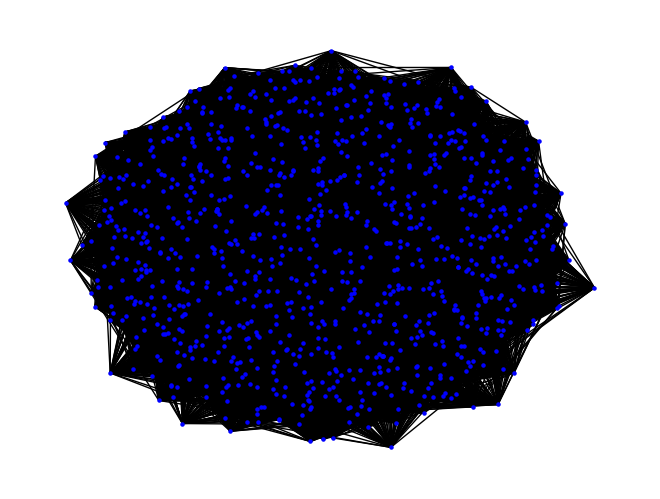

In [23]:
# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)
pos = nx.spring_layout(g) 
nx.draw(g, pos, node_color='blue', node_size=5)

In [24]:
print("graph with type: ", type(g), ". And the", g)

graph with type:  <class 'networkx.classes.graph.Graph'> . And the Graph with 1000 nodes and 49741 edges


### Load IC mode and set the threshold 

In [25]:
# Model selection
model = ep.IndependentCascadesModel(g)

# Model Configuration
config = mc.Configuration()
#config.add_model_parameter('fraction_infected', 0.008)

# Setting the edge parameters
threshold = 0.01
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

### Randomly generate initial seed node

In [26]:
# Generate a random initial set of nodes
num_initial_nodes = 10  # Replace with the desired number of initial nodes
nodes_list = list(g.nodes())
initial_set = random.sample(nodes_list, num_initial_nodes)

print("Initial seed set randomy generated as:",initial_set)

config.add_model_initial_configuration("Infected", initial_set)
model.set_initial_status(config)

effected_node = []

Initial seed set randomy generated as: [617, 771, 463, 51, 348, 596, 820, 703, 286, 991]


---

## Spreading iteration: 

### Parameters for iterations

- **Iterations:** list contain each iteration

- **Iteration:** dictionary contain parameters
  - `iteration`: ID
  - `status`: dic with node state pair
  - `node_count`: count nodes in each state, 0 is susceptible, 1 is infected, 2 is incativation.
  - `status_delta`: Describes the changes in the three states. Negitave number refers to decrease, positive refers to increase.
---

[{'iteration': 10, 'status': {134: 1, 356: 1, 378: 2, 464: 2, 651: 1, 664: 1, 787: 1, 992: 2}, 'node_count': {0: 944, 1: 5, 2: 51}, 'status_delta': {0: -5, 1: 2, 2: 3}}, {'iteration': 11, 'status': {123: 1, 134: 2, 249: 1, 356: 2, 498: 1, 651: 2, 656: 1, 664: 2, 787: 2, 839: 1, 853: 1}, 'node_count': {0: 938, 1: 6, 2: 56}, 'status_delta': {0: -6, 1: 1, 2: 5}}, {'iteration': 12, 'status': {43: 1, 85: 1, 123: 2, 249: 2, 344: 1, 498: 2, 588: 1, 656: 2, 829: 1, 839: 2, 853: 2, 856: 1, 961: 1}, 'node_count': {0: 931, 1: 7, 2: 62}, 'status_delta': {0: -7, 1: 1, 2: 6}}, {'iteration': 13, 'status': {43: 2, 85: 2, 101: 1, 203: 1, 226: 1, 344: 2, 390: 1, 579: 1, 588: 2, 778: 1, 829: 2, 856: 2, 865: 1, 894: 1, 961: 2}, 'node_count': {0: 923, 1: 8, 2: 69}, 'status_delta': {0: -8, 1: 1, 2: 7}}, {'iteration': 14, 'status': {101: 2, 203: 2, 226: 2, 272: 1, 324: 1, 390: 2, 399: 1, 468: 1, 510: 1, 579: 2, 778: 2, 865: 2, 894: 2, 938: 1}, 'node_count': {0: 917, 1: 6, 2: 77}, 'status_delta': {0: -6, 1: -

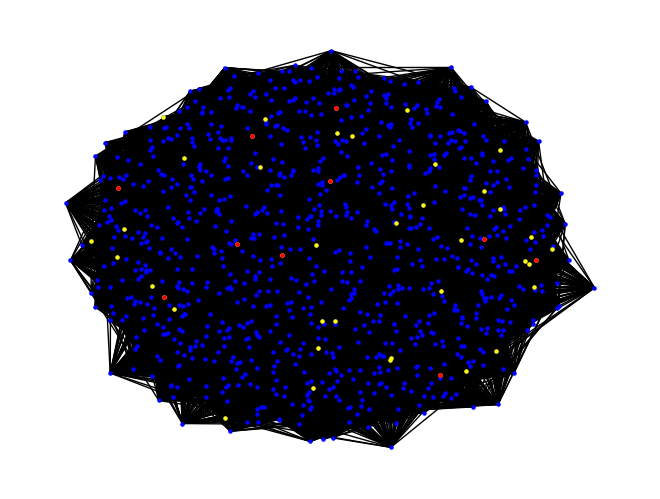

-----------------------------------Previous Status--------------------------------------------
iteration 11
There is the changing info during iteration  11 : {0: -6, 1: 1, 2: 5}
There is the result after iteration  11 : {0: 938, 1: 6, 2: 56}
-------------------Continue...----------------------
iteration 12
There is the changing info during iteration  12 : {0: -7, 1: 1, 2: 6}
There is the result after iteration  12 : {0: 931, 1: 7, 2: 62}
-------------------Continue...----------------------
iteration 13
There is the changing info during iteration  13 : {0: -8, 1: 1, 2: 7}
There is the result after iteration  13 : {0: 923, 1: 8, 2: 69}
-------------------Continue...----------------------
iteration 14
There is the changing info during iteration  14 : {0: -6, 1: -2, 2: 8}
There is the result after iteration  14 : {0: 917, 1: 6, 2: 77}
-------------------Continue...----------------------
                                                                            
---------------------------

In [30]:
iterations = model.iteration_bunch(5)  # Replace '5' with the desired number of iterations
print(iterations)
#print(g.edges(data=True))

# Visualize the spreading process
for i, iteration in enumerate(iterations):
    if i == 0:
        #print("Previous Status:")
        #for node,state in iteration["status"].items():
            #if state == 0:
                #print("The node {} is Susceptible".format(node))
            #elif state == 1:
                #print("The node {} is Infected".format(node))
            #elif state == 2:
                #print("The node {} is inactivation".format(node)) 
        #nx.draw(g, with_labels=False, node_size=5)
        if len(effected_node) == 0:
            nx.draw(g, pos, node_color='blue', node_size=5)
            nx.draw_networkx_nodes(g, pos, nodelist=initial_set, node_color='red', node_size=5)
            plt.show()
            print("---------------------Initial seed node activated, spreading begin!----------------------------")
        else:
            nx.draw(g, pos, node_color='blue', cmap=plt.cm.Reds, node_size=5)
            nx.draw_networkx_nodes(g, pos, nodelist=effected_node, node_color='yellow', node_size=5)
            nx.draw_networkx_nodes(g, pos, nodelist=initial_set, node_color='red', node_size=5)
            plt.show()
            print("-----------------------------------Previous Status--------------------------------------------") 
    else:
        print("iteration", iteration['iteration'])
        #for node,state in iteration["status"].items():
            #if state == 1:
                #print("The node {} is Infected".format(node))
            #elif state == 2:
                #print("The node {} is inactivation".format(node))
        print("There is the changing info during iteration ", iteration['iteration'],":",iteration['status_delta'])
        print("There is the result after iteration ", iteration['iteration'],":",iteration['node_count'])
        print("-------------------Continue...----------------------")
        activate_node = []
        inactivated_node = []
        for node ,statu in iteration["status"].items():
            if statu == 1:
                activate_node.append(node)
            elif statu == 2:
                inactivated_node.append(node)
                effected_node.append(node)
        #pos = nx.spring_layout(g)  # Replace with your preferred layout algorithm
        #nx.draw(g, pos, node_color='blue', cmap=plt.cm.Reds, node_size=5)  # Start with blue nodes
        #nx.draw_networkx_nodes(g, pos, nodelist=activate_node, node_color='red', node_size=5)

        #print("activate node in iteration ", iteration["iteration"], "is: ", activate_node)
        #print("inactivate node in iteration ", iteration["iteration"], "is: ", inactivated_node)
        #plt.show()
print("                                                                            ")
print("-----------------------------------iteration pause.--------------------------------------------")
print(len(effected_node), " nodes effected from lastest iteration:", effected_node)

there is still  3 activate nodes which is [378, 464, 992]


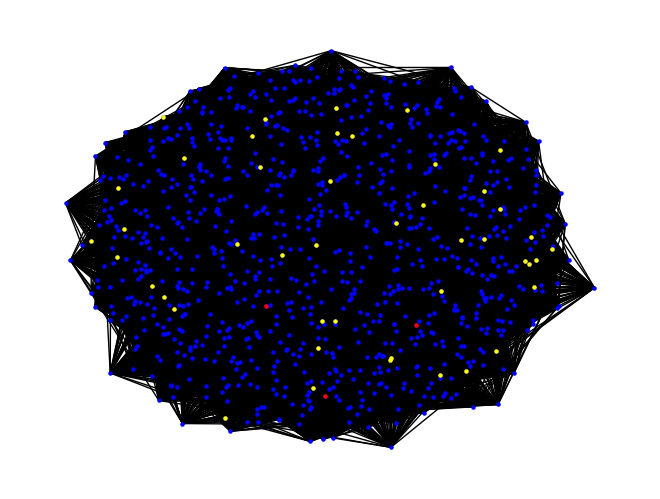

In [29]:
print("there is still ", len(activate_node), "activate nodes which is", activate_node)
nx.draw(g, pos, node_color='blue', node_size=5)
nx.draw_networkx_nodes(g, pos, nodelist=effected_node, node_color='yellow', node_size=5)
nx.draw_networkx_nodes(g, pos, nodelist=activate_node, node_color='red', node_size=5)
plt.show()

## Parallel Spreading

In [9]:
import multiprocessing as mp

In [2]:
def spread_simulation(graph, initial_node):
    

    return spreading_result

def run_spreading_simulation(graph, initial_node):
    # Run a single spreading simulation for a given source node
    result = spread_simulation(graph, initial_node)
    return result

def parallel_spreading_simulation(graph, initial_nodes, num_processes):
    # Create a multiprocessing Pool with the desired number of processes
    pool = mp.Pool(num_processes)

    # Generate the arguments for each spreading simulation
    arguments = [(graph, node) for node in initial_nodes]

    # Run spreading simulations in parallel
    results = pool.starmap(run_spreading_simulation, arguments)

    # Close the pool to free resources
    pool.close()
    pool.join()

    return results

## Use SNAP generate network structure

In [22]:
import snap

In [4]:
G1 = snap.GenRndGnm(snap.PNGraph, 10, 60)
#Ran = snap.TRnd(1,0)
n = 100  # number of nodes
k = 4  # each node is connected to k nearest neighbors
p = 0.3  # probability of rewiring each edge
# snap_graph = snap.GenSmallWorld(n, k, p, Ran)
# print(snap_graph)

AttributeError: module 'snap' has no attribute 'GenRndGnm'